<a href="https://colab.research.google.com/github/patil-piyush/Stock-Market-Analysis---Prediction/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Setting parameters for stock analysis
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2015-01-01'
end_date = '2024-01-01'

In [ ]:
# Fetching historical data for all tickers
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(start=start_date, end=end_date)

In [ ]:
# Data Analysis
for ticker in tickers:
    print(data[ticker].head().to_string())
    print(data[ticker].tail().to_string())

                                Open       High        Low      Close     Volume  Dividends  Stock Splits
Date                                                                                                     
2015-01-02 00:00:00-05:00  24.805920  24.817055  23.906234  24.347170  212818400        0.0           0.0
2015-01-05 00:00:00-05:00  24.115575  24.195745  23.474215  23.661278  257142000        0.0           0.0
2015-01-06 00:00:00-05:00  23.725852  23.924050  23.300505  23.663498  263188400        0.0           0.0
2015-01-07 00:00:00-05:00  23.872833  24.095527  23.761486  23.995316  160423600        0.0           0.0
2015-01-08 00:00:00-05:00  24.324897  24.975164  24.206868  24.917263  237458000        0.0           0.0
                                 Open        High         Low       Close    Volume  Dividends  Stock Splits
Date                                                                                                        
2023-12-22 00:00:00-05:00  194.228473  1

In [ ]:
# Data Analysis
dataFrames = {}
for ticker in tickers:
    dataFrames[ticker] = pd.DataFrame(data[ticker])
    dataFrames[ticker].drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    print(dataFrames[ticker].info())
    print(dataFrames[ticker].describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2264 non-null   float64
 1   High    2264 non-null   float64
 2   Low     2264 non-null   float64
 3   Close   2264 non-null   float64
dtypes: float64(4)
memory usage: 88.4 KB
None
              Open         High          Low        Close
count  2264.000000  2264.000000  2264.000000  2264.000000
mean     81.694108    82.591096    80.852235    81.762838
std      56.189211    56.820024    55.606247    56.244113
min      20.619367    21.001971    20.497948    20.697268
25%      32.975317    33.160179    32.781150    32.963106
50%      51.600038    52.267493    51.076536    51.452509
75%     139.587657   141.340210   137.134192   139.646381
max     197.054623   198.646813   196.039598   197.144180
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226

In [ ]:
# Calculating Technical Indicators
# RSI
for ticker in tickers:
    rsi_period = 14
    delta = dataFrames[ticker]['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    dataFrames[ticker]['RSI'] = rsi

In [ ]:
# EMA for 20 days and 50 days
def calculate_ema(df, period):
    ema = df['Close'].ewm(span=period, adjust=False).mean()
    df[f'EMA_{period}'] = ema
    return df

for ticker in tickers:
    ema_period_short = 20
    ema_period_long = 50
    dataFrames[ticker] = calculate_ema(dataFrames[ticker], ema_period_short)
    dataFrames[ticker] = calculate_ema(dataFrames[ticker], ema_period_long)

In [ ]:
# SMA for 20 days and 50 days
def calculate_sma(df, period):
    df[f'SMA_{period}'] = df['Close'].rolling(window=period).mean()
    return df

for ticker in tickers:
    sma_period_short = 20
    sma_period_long = 50
    dataFrames[ticker] = calculate_sma(dataFrames[ticker], sma_period_short)
    dataFrames[ticker] = calculate_sma(dataFrames[ticker], sma_period_long)

In [ ]:
# MACD AND SINGLE LINE
short_period = 20
long_period = 50
signal_period = 9
for ticker in tickers:
    short_ema = dataFrames[ticker]['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = dataFrames[ticker]['Close'].ewm(span=long_period, adjust=False).mean()
    dataFrames[ticker]['MACD'] = short_ema - long_ema
    dataFrames[ticker]['Signal_Line'] = dataFrames[ticker]['MACD'].ewm(span=signal_period, adjust=False).mean()

In [ ]:
# Analysis of the framed data with technical indicators
for ticker in tickers:
    print(dataFrames[ticker].head())
    print(dataFrames[ticker].info())
    print(dataFrames[ticker].describe())

                                Open       High        Low      Close  RSI  \
Date                                                                         
2015-01-02 00:00:00-05:00  24.805920  24.817055  23.906234  24.347170  NaN   
2015-01-05 00:00:00-05:00  24.115575  24.195745  23.474215  23.661278  NaN   
2015-01-06 00:00:00-05:00  23.725852  23.924050  23.300505  23.663498  NaN   
2015-01-07 00:00:00-05:00  23.872833  24.095527  23.761486  23.995316  NaN   
2015-01-08 00:00:00-05:00  24.324897  24.975164  24.206868  24.917263  NaN   

                              EMA_20     EMA_50  SMA_20  SMA_50      MACD  \
Date                                                                        
2015-01-02 00:00:00-05:00  24.347170  24.347170     NaN     NaN  0.000000   
2015-01-05 00:00:00-05:00  24.281847  24.320272     NaN     NaN -0.038425   
2015-01-06 00:00:00-05:00  24.222956  24.294516     NaN     NaN -0.071560   
2015-01-07 00:00:00-05:00  24.201276  24.282783     NaN     NaN -0.0

In [ ]:
# cleaning of the data
for df_name, df in dataFrames.items():
    original_shape = df.shape
    df_dropped = df.dropna()  # Drop rows with any null values
    new_shape = df_dropped.shape

    # Update the dictionary with the cleaned DataFrame
    dataFrames[df_name] = df_dropped

    print(f"{df_name}:")
    print(f"Original shape: {original_shape}, New shape after dropping nulls: {new_shape}")
    print(df_dropped)
    print()  # For better readability

AAPL:
Original shape: (2264, 11), New shape after dropping nulls: (2215, 11)
                                 Open        High         Low       Close  \
Date                                                                        
2015-03-16 00:00:00-04:00   27.696253   27.935476   27.470445   27.935476   
2015-03-17 00:00:00-04:00   28.147869   28.465343   28.091976   28.402742   
2015-03-18 00:00:00-04:00   28.393803   28.876722   28.252952   28.722456   
2015-03-19 00:00:00-04:00   28.785055   28.896842   28.483232   28.505589   
2015-03-20 00:00:00-04:00   28.673256   28.706791   27.982416   28.147860   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00-05:00  194.228473  194.457363  192.029255  192.656189   
2023-12-26 00:00:00-05:00  192.666108  192.944742  191.889912  192.108841   
2023-12-27 00:00:00-05:00  191.551588  192.556659  190.158404  192.208359   
2023-12-28 00:00:00-05:00  193.193528  193.710998  192.228256  192.636261   

In [ ]:
def drop_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Drop outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

In [ ]:
for ticker in tickers:
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'RSI')
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'EMA_20')
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'EMA_50')
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'SMA_20')
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'SMA_50')
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'MACD')
    dataFrames[ticker] = drop_outliers(dataFrames[ticker], 'Signal_Line')

In [ ]:
for ticker, df in dataFrames.items():
    print(f"{ticker} DataFrame shape: {df.shape}")

AAPL DataFrame shape: (1907, 11)
MSFT DataFrame shape: (1676, 11)
GOOGL DataFrame shape: (1926, 11)
AMZN DataFrame shape: (1879, 11)


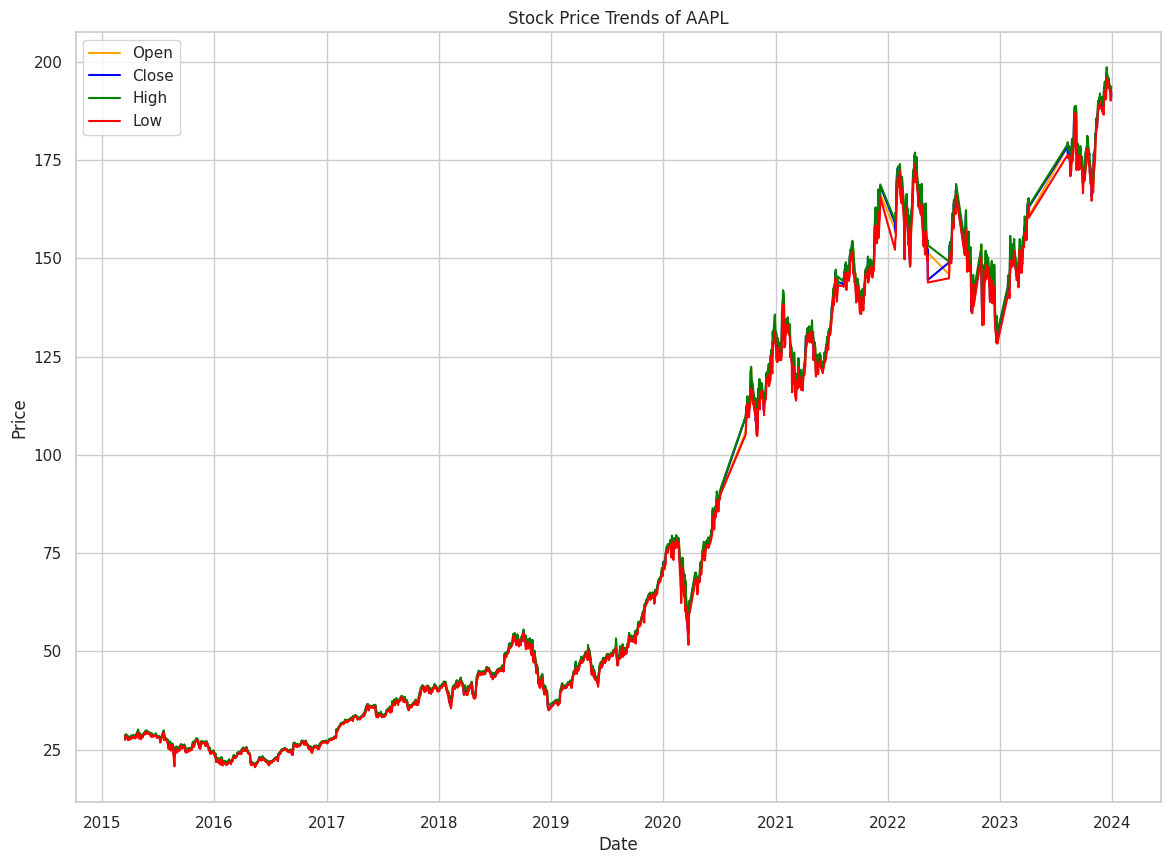

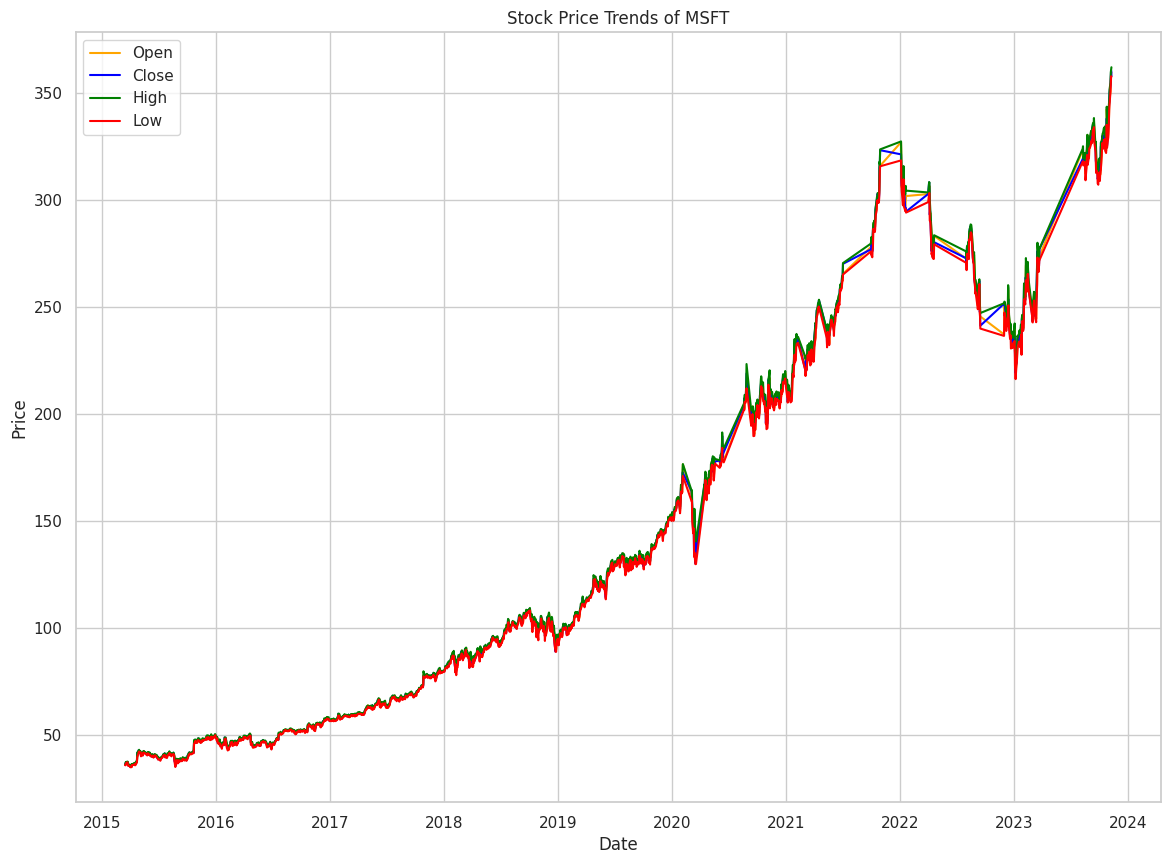

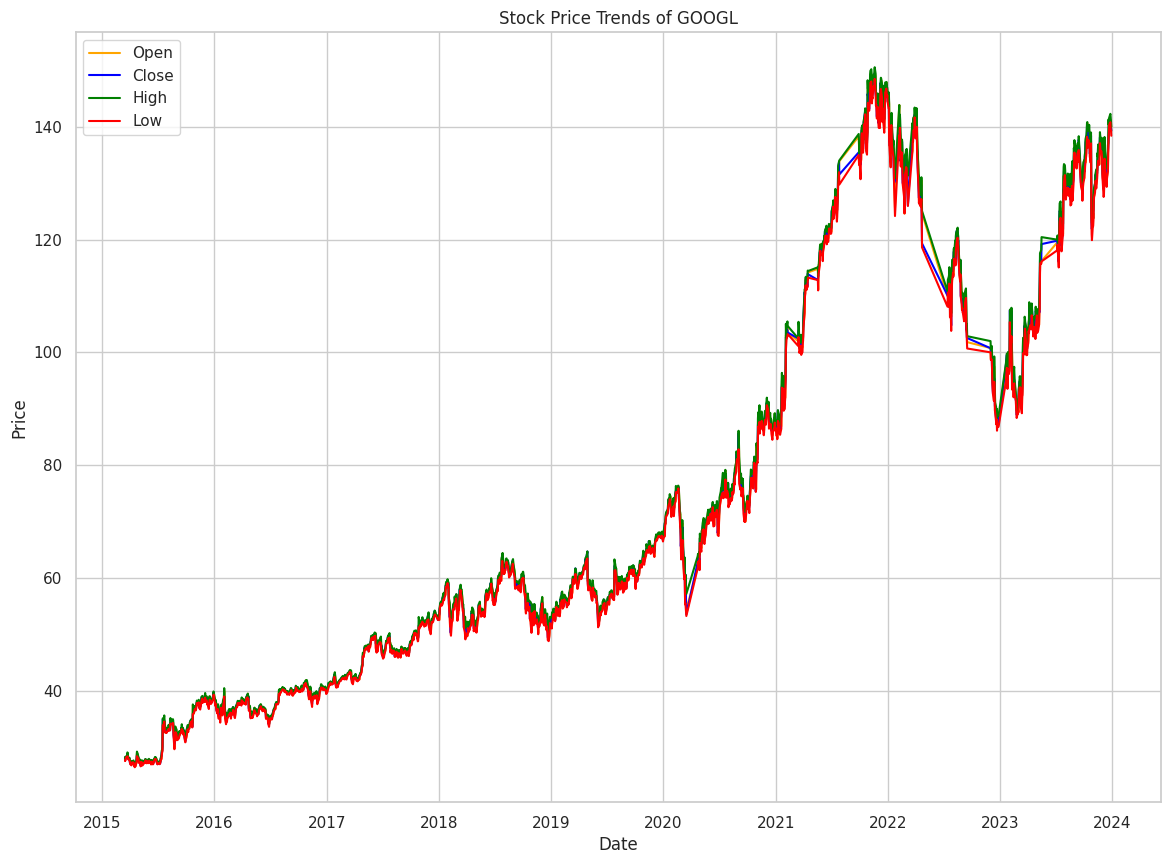

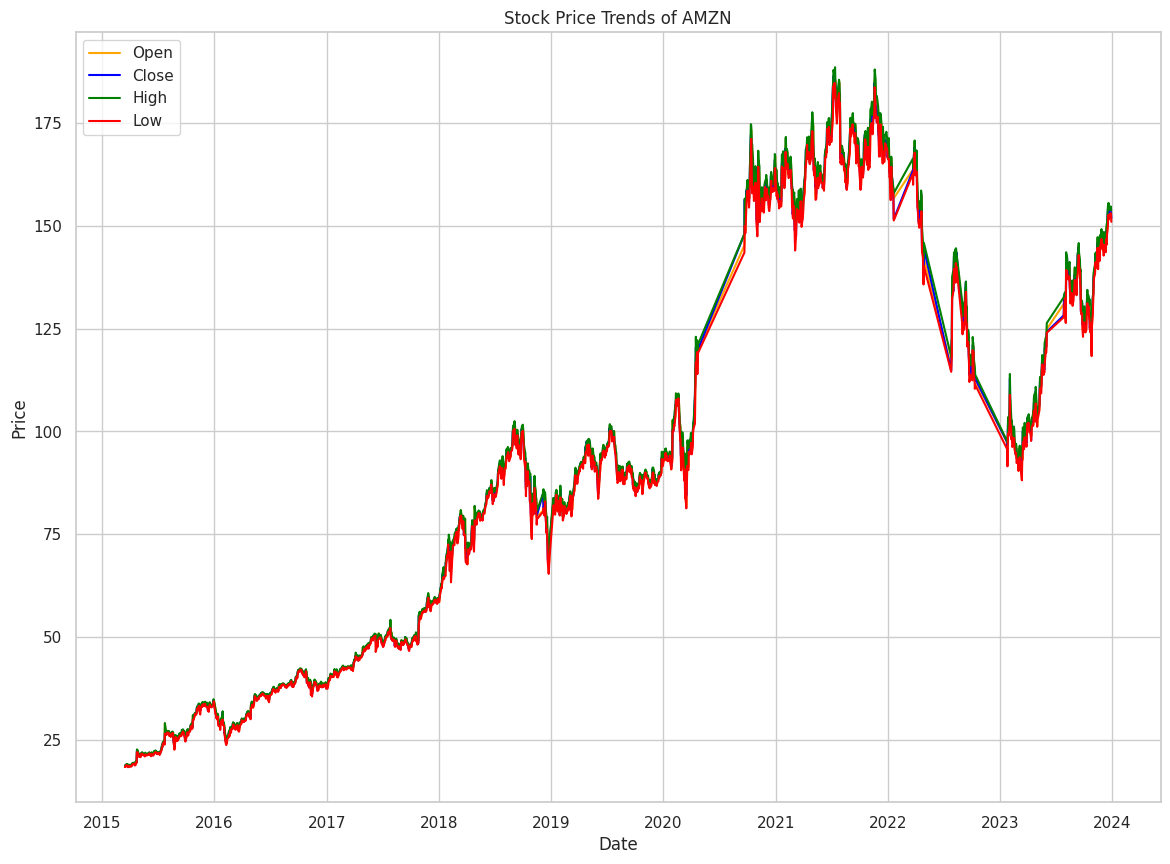

In [ ]:
#Graphical Visualisation
for ticker in tickers:
    df = dataFrames[ticker]
    # Set Seaborn style for aesthetics
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(14, 10))

    # Plot Open, Close, High, Low using Seaborn's lineplot
    sns.lineplot(data=df, x=df.index, y='Open', label='Open', color='orange')
    sns.lineplot(data=df, x=df.index, y='Close', label='Close', color='blue')
    sns.lineplot(data=df, x=df.index, y='High', label='High', color='green')
    sns.lineplot(data=df, x=df.index, y='Low', label='Low', color='red')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Stock Price Trends of {ticker}')
    plt.legend(loc='upper left')

    # Show plot
    plt.show()

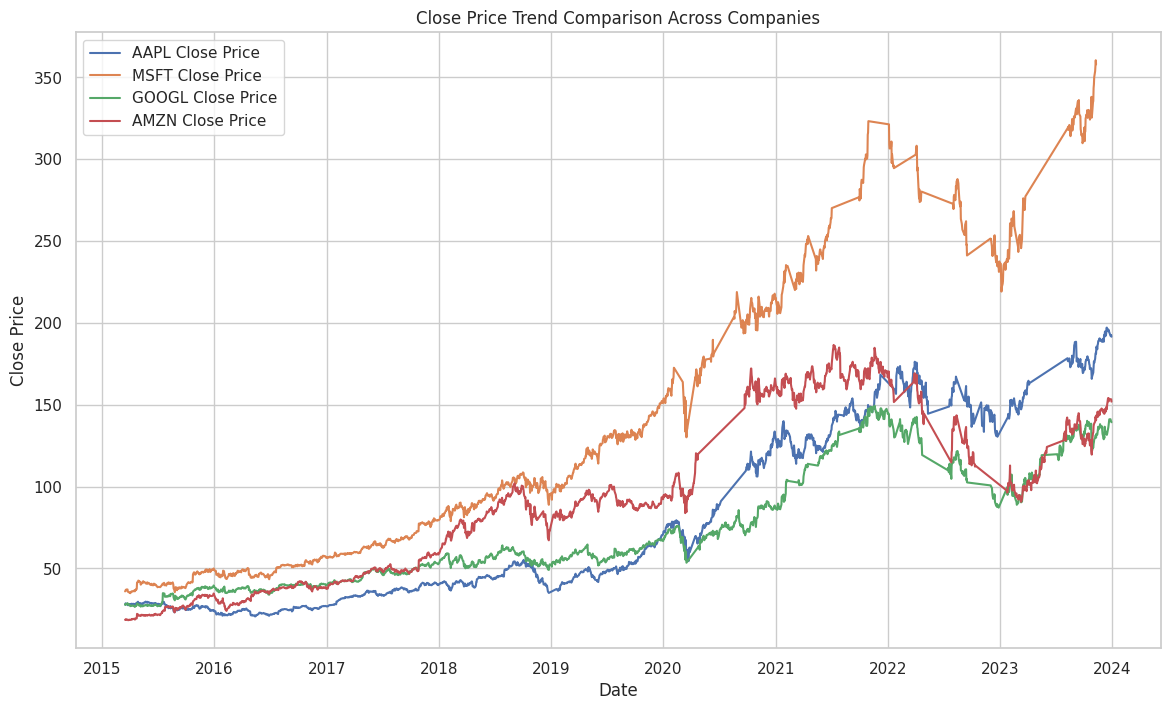

In [ ]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    company_data = dataFrames[ticker]
    plt.plot(company_data.index, company_data['Close'], label=f'{ticker} Close Price')  # Access index directly

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Trend Comparison Across Companies')
plt.legend()
plt.show()

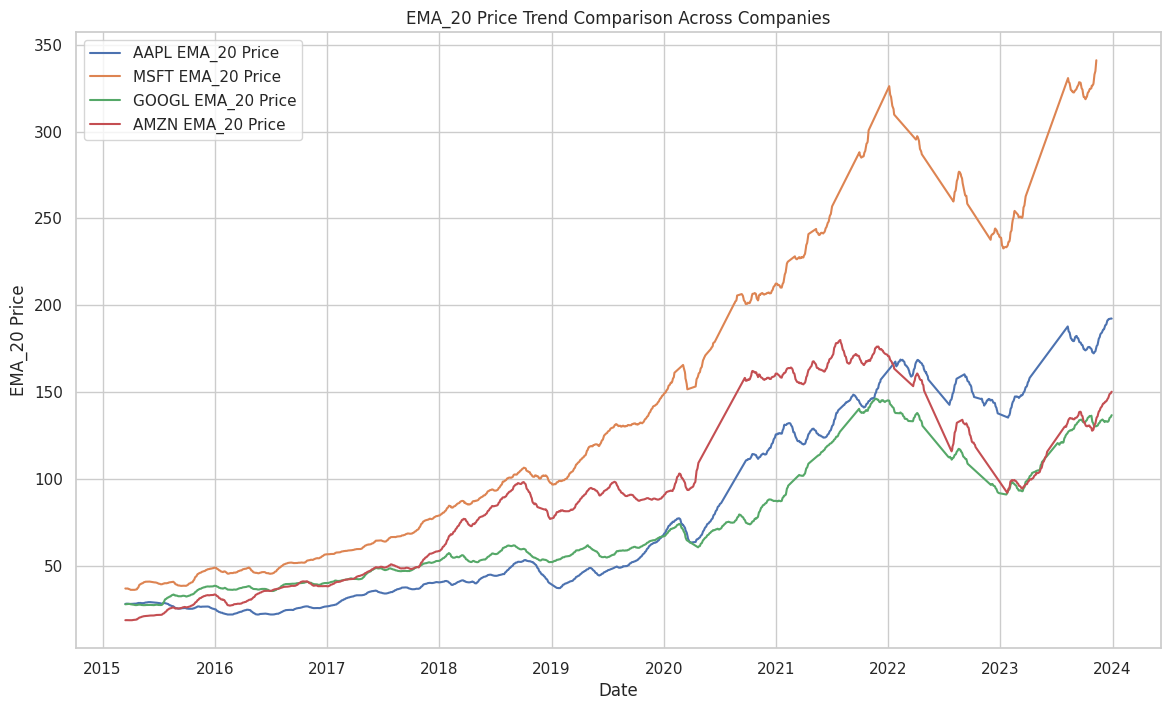

In [ ]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    company_data = dataFrames[ticker]
    plt.plot(company_data.index, company_data['EMA_20'], label=f'{ticker} EMA_20 Price')  # Access index directly

plt.xlabel('Date')
plt.ylabel('EMA_20 Price')
plt.title('EMA_20 Price Trend Comparison Across Companies')
plt.legend()
plt.show()

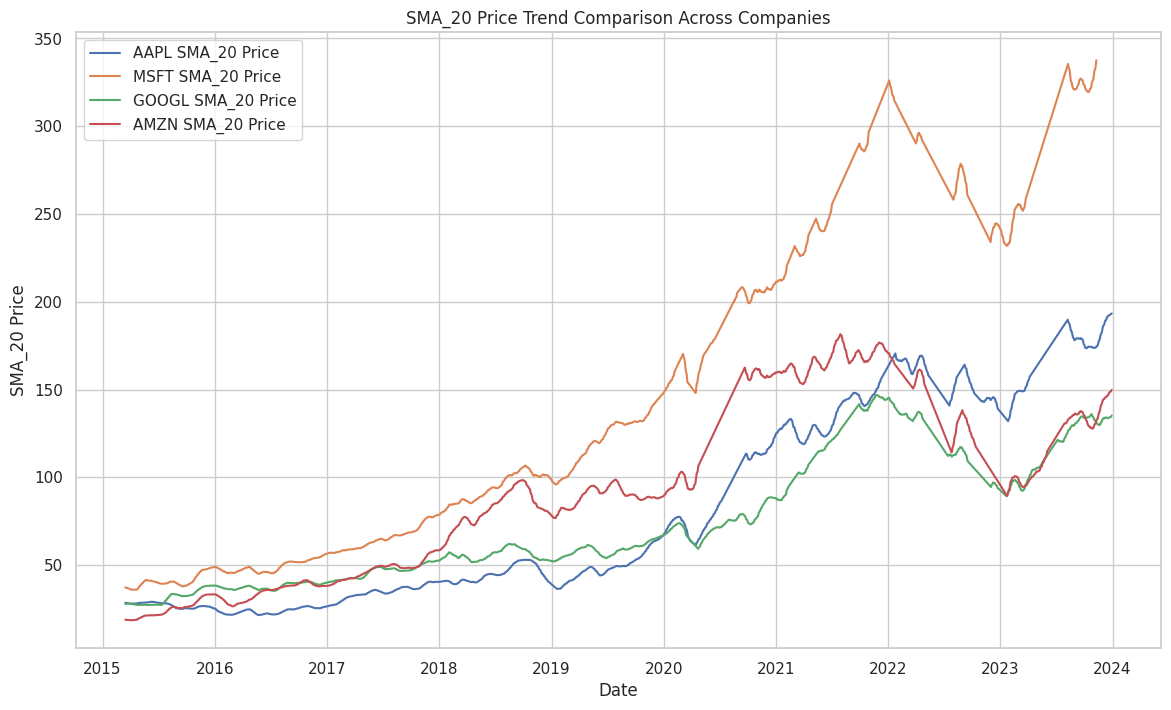

In [ ]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    company_data = dataFrames[ticker]
    plt.plot(company_data.index, company_data['SMA_20'], label=f'{ticker} SMA_20 Price')  # Access index directly

plt.xlabel('Date')
plt.ylabel('SMA_20 Price')
plt.title('SMA_20 Price Trend Comparison Across Companies')
plt.legend()
plt.show()

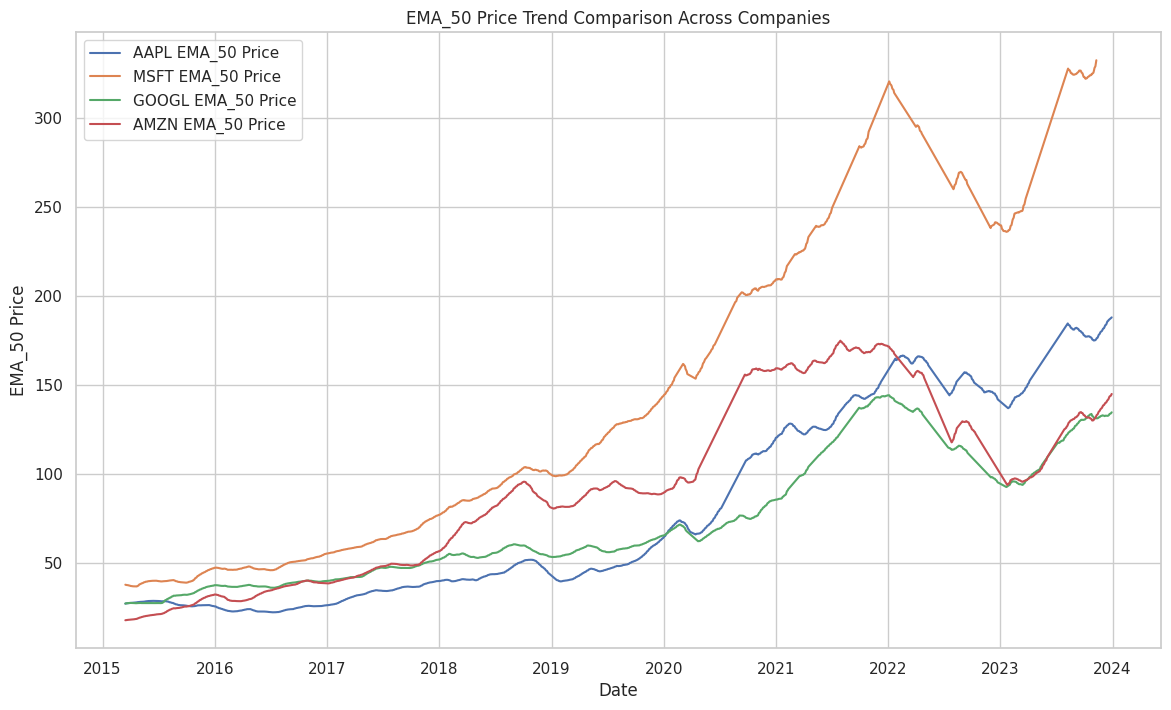

In [ ]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    company_data = dataFrames[ticker]
    plt.plot(company_data.index, company_data['EMA_50'], label=f'{ticker} EMA_50 Price')  # Access index directly

plt.xlabel('Date')
plt.ylabel('EMA_50 Price')
plt.title('EMA_50 Price Trend Comparison Across Companies')
plt.legend()
plt.show()

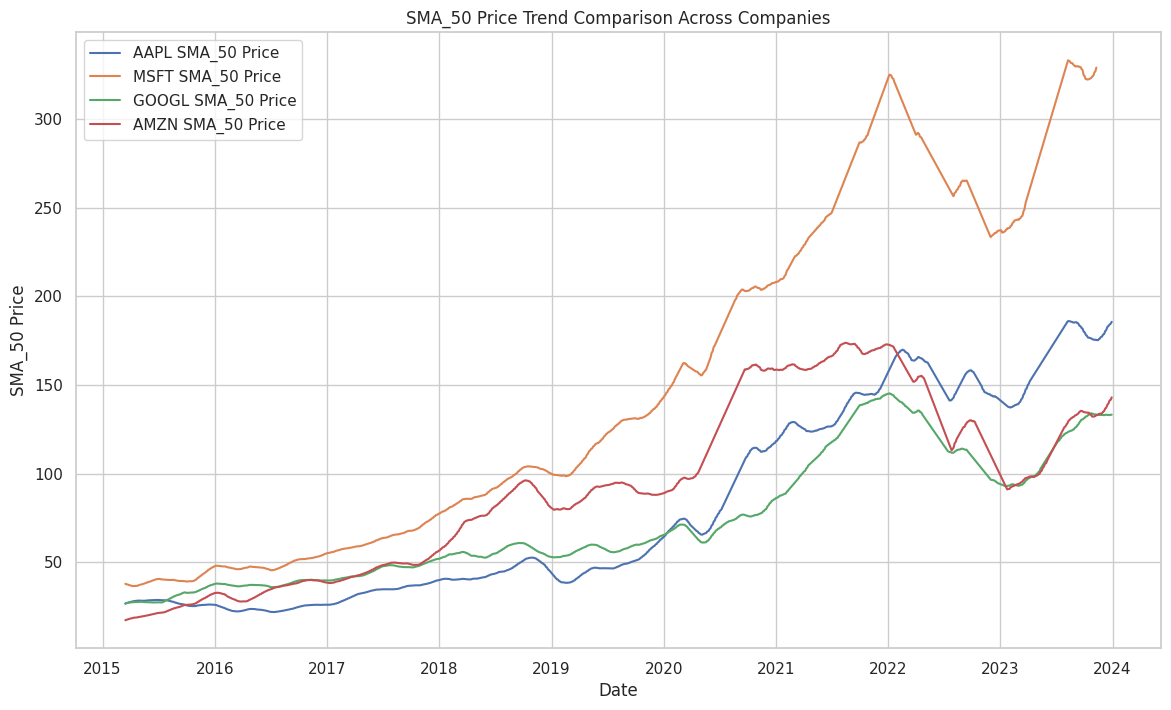

In [ ]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    company_data = dataFrames[ticker]
    plt.plot(company_data.index, company_data['SMA_50'], label=f'{ticker} SMA_50 Price')  # Access index directly

plt.xlabel('Date')
plt.ylabel('SMA_50 Price')
plt.title('SMA_50 Price Trend Comparison Across Companies')
plt.legend()
plt.show()

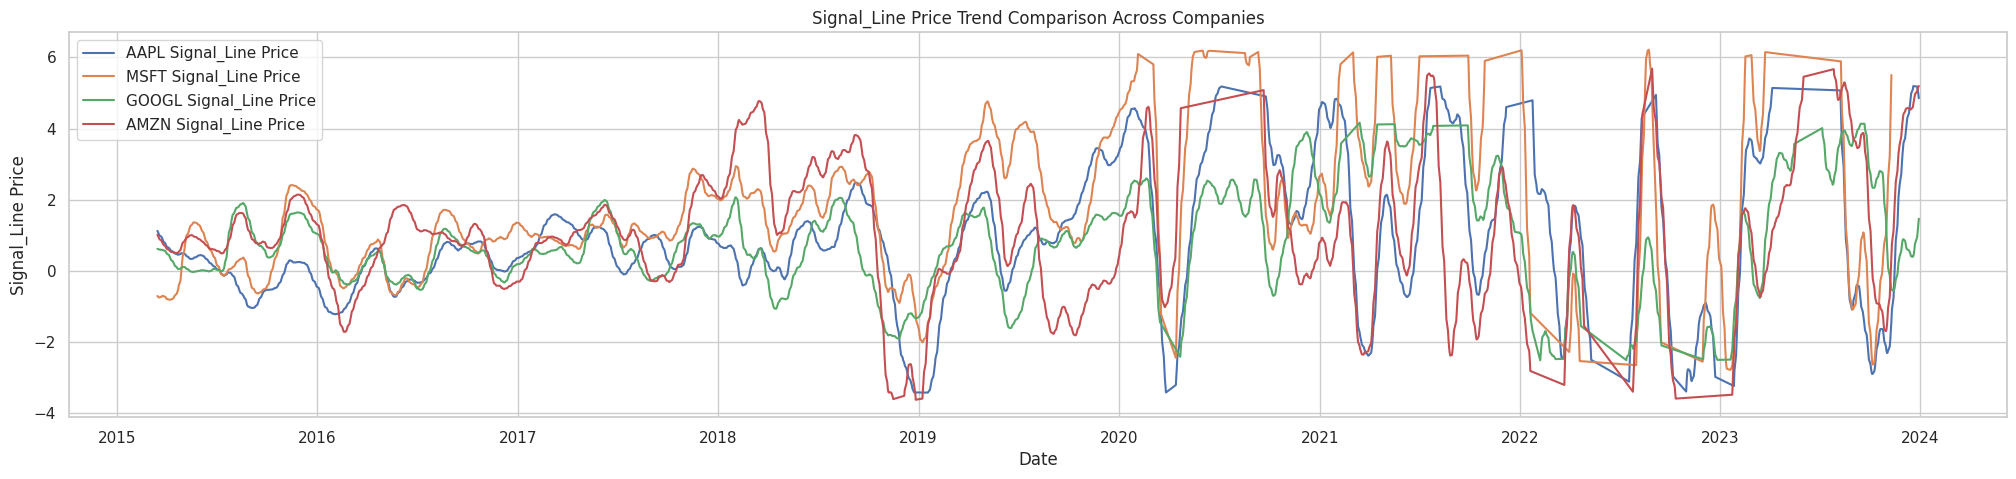

In [ ]:
plt.figure(figsize=(25, 5))
for ticker in tickers:
    company_data = dataFrames[ticker]
    plt.plot(company_data.index, company_data['Signal_Line'], label=f'{ticker} Signal_Line Price')  # Access index directly

plt.xlabel('Date')
plt.ylabel('Signal_Line Price')
plt.title('Signal_Line Price Trend Comparison Across Companies')
plt.legend()
plt.show()

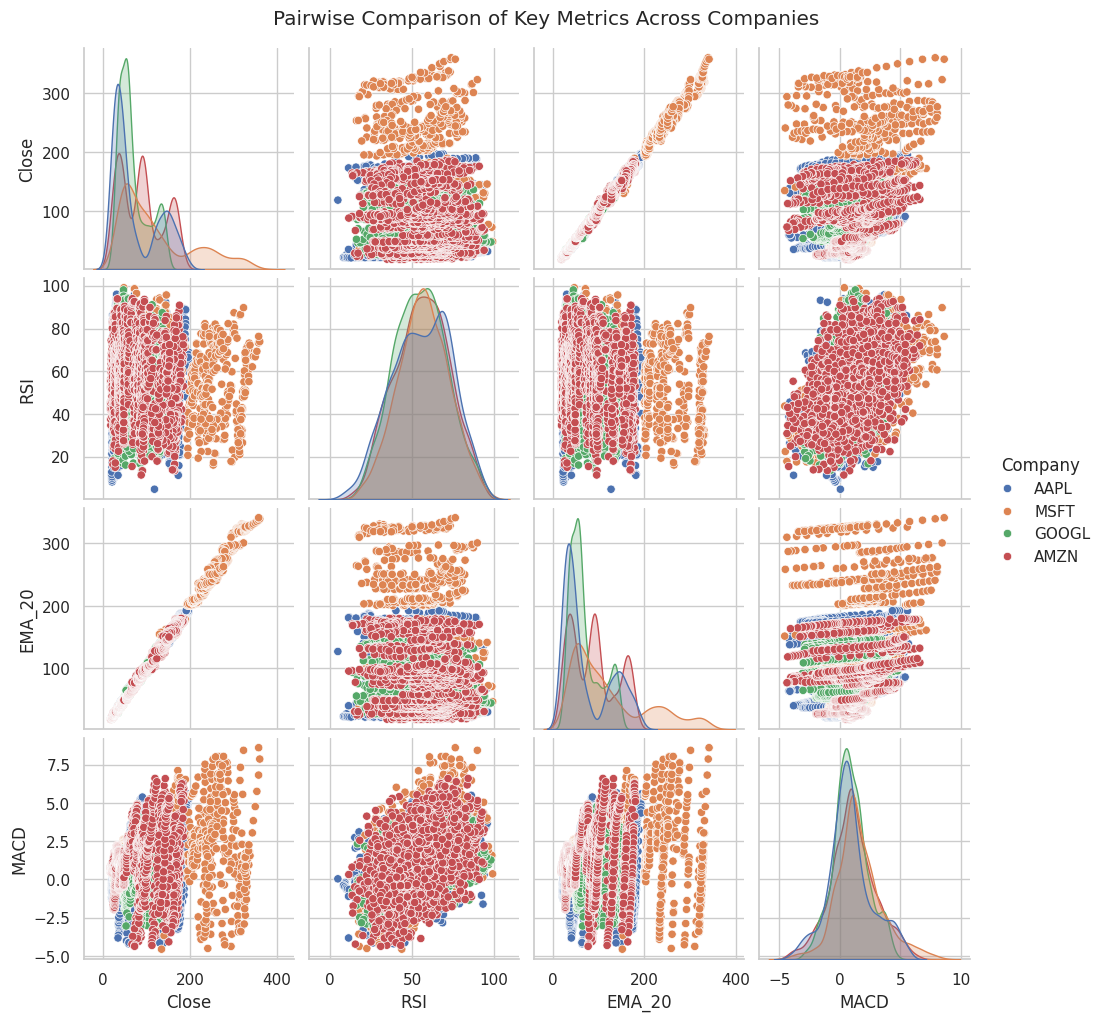

In [ ]:
 #To see how different factors are related to each other

combined_data = []

# Loop through each ticker and its DataFrame
for ticker in tickers:
    df = dataFrames[ticker].copy()  # Copy to avoid modifying original DataFrame
    df['Company'] = ticker  # Add a column for the company name
    combined_data.append(df)

# Concatenate all DataFrames into a single DataFrame for pairplot
combined_df = pd.concat(combined_data, ignore_index=True)

# Create a pairplot comparing metrics across all companies with hue
sns.pairplot(combined_df, hue='Company', vars=['Close', 'RSI', 'EMA_20', 'MACD'], diag_kind='kde')
plt.suptitle('Pairwise Comparison of Key Metrics Across Companies', y=1.02)
plt.show()

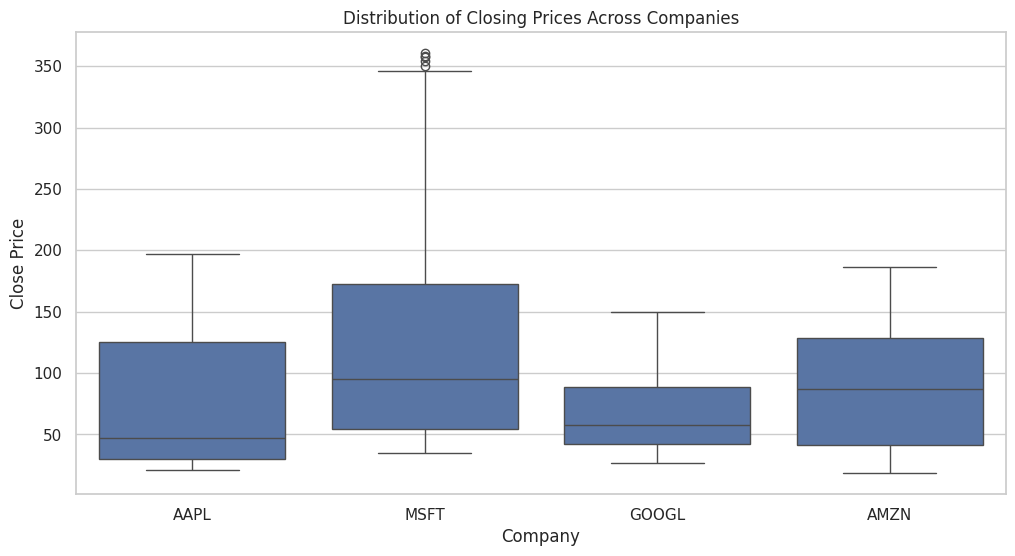

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Company', y='Close')
plt.title('Distribution of Closing Prices Across Companies')
plt.ylabel('Close Price')
plt.xlabel('Company')
plt.show()

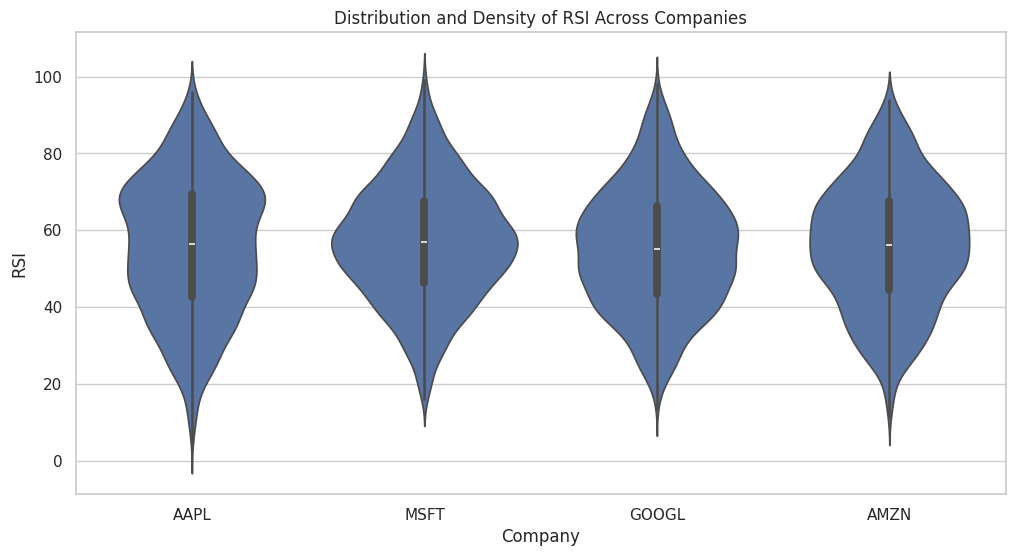

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=combined_df, x='Company', y='RSI')
plt.title('Distribution and Density of RSI Across Companies')
plt.ylabel('RSI')
plt.show()


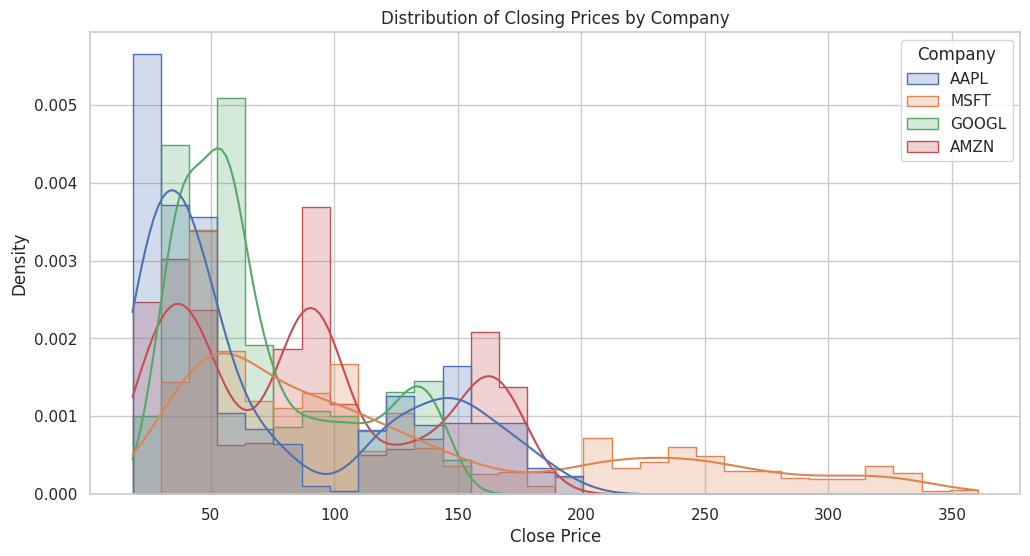

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='Close', hue='Company', bins=30, kde=True, element='step', stat='density')
plt.title('Distribution of Closing Prices by Company')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()


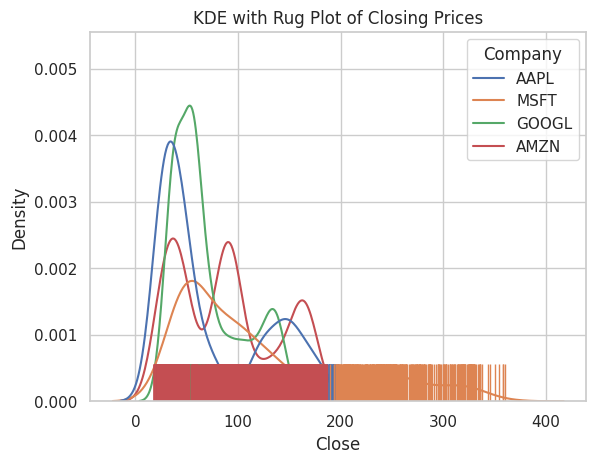

In [ ]:
sns.kdeplot(data=combined_df, x='Close', hue='Company')
sns.rugplot(data=combined_df, x='Close', hue='Company', height=0.1)
plt.title('KDE with Rug Plot of Closing Prices')
plt.show()

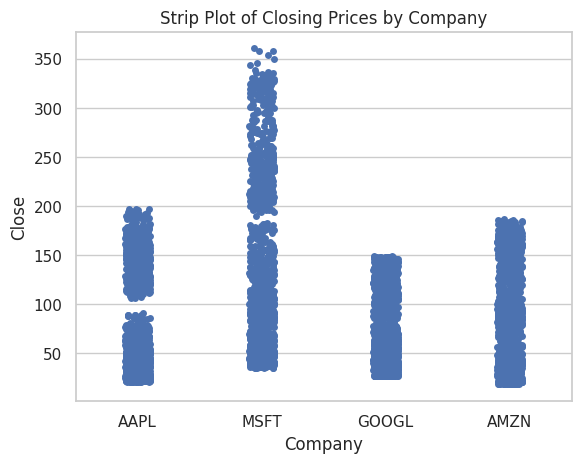

In [ ]:
sns.stripplot(data=combined_df, x='Company', y='Close', jitter=True)
plt.title('Strip Plot of Closing Prices by Company')
plt.show()

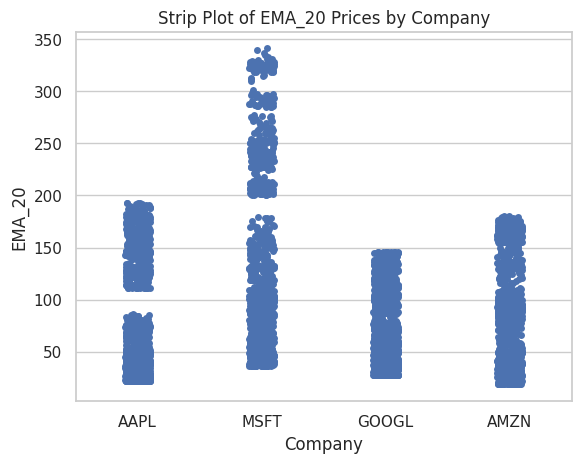

In [ ]:
sns.stripplot(data=combined_df, x='Company', y='EMA_20', jitter=True)
plt.title('Strip Plot of EMA_20 Prices by Company')
plt.show()

In [ ]:
merged_df = pd.concat(
    [dataFrames[ticker].add_suffix(f'_{ticker}') for ticker in tickers],
    axis=1
)

# Display the merged DataFrame
print(merged_df)

                            Open_AAPL   High_AAPL    Low_AAPL  Close_AAPL  \
Date                                                                        
2015-03-16 00:00:00-04:00   27.696253   27.935476   27.470445   27.935476   
2015-03-17 00:00:00-04:00   28.147869   28.465343   28.091976   28.402742   
2015-03-18 00:00:00-04:00   28.393803   28.876722   28.252952   28.722456   
2015-03-19 00:00:00-04:00   28.785055   28.896842   28.483232   28.505589   
2015-03-20 00:00:00-04:00   28.673256   28.706791   27.982416   28.147860   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00-05:00         NaN         NaN         NaN         NaN   
2023-12-26 00:00:00-05:00  192.666108  192.944742  191.889912  192.108841   
2023-12-27 00:00:00-05:00  191.551588  192.556659  190.158404  192.208359   
2023-12-28 00:00:00-05:00  193.193528  193.710998  192.228256  192.636261   
2023-12-29 00:00:00-05:00  192.954701  193.452263  190.795282  191.591385   

In [ ]:
training_df = merged_df.dropna()
print(training_df.head())

                           Open_AAPL  High_AAPL   Low_AAPL  Close_AAPL  \
Date                                                                     
2015-03-16 00:00:00-04:00  27.696253  27.935476  27.470445   27.935476   
2015-03-17 00:00:00-04:00  28.147869  28.465343  28.091976   28.402742   
2015-03-18 00:00:00-04:00  28.393803  28.876722  28.252952   28.722456   
2015-03-19 00:00:00-04:00  28.785055  28.896842  28.483232   28.505589   
2015-03-20 00:00:00-04:00  28.673256  28.706791  27.982416   28.147860   

                            RSI_AAPL  EMA_20_AAPL  EMA_50_AAPL  SMA_20_AAPL  \
Date                                                                          
2015-03-16 00:00:00-04:00  32.710875    28.031893    27.100324    28.552759   
2015-03-17 00:00:00-04:00  45.533531    28.067212    27.151399    28.543928   
2015-03-18 00:00:00-04:00  44.971718    28.129616    27.213009    28.541134   
2015-03-19 00:00:00-04:00  47.391345    28.165423    27.263699    28.530514   
2015-03

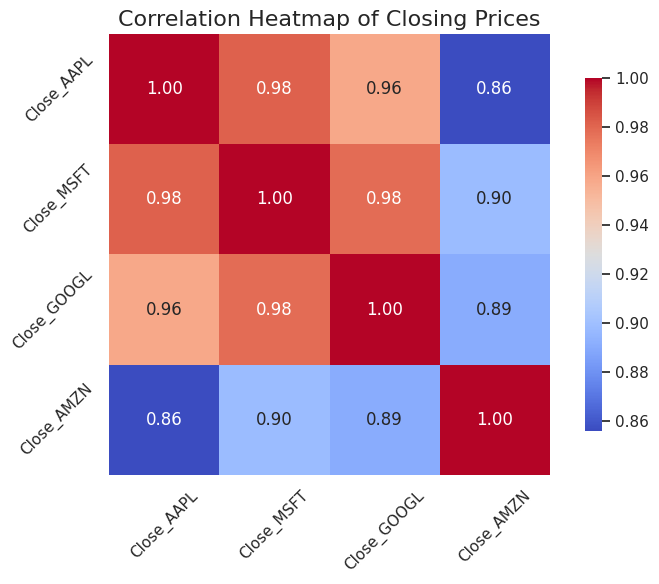

In [ ]:
selected_columns = []
for ticker in tickers:
    selected_columns.append(f'Close_{ticker}')
selected_data = training_df[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Customize the heatmap
plt.title('Correlation Heatmap of Closing Prices', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

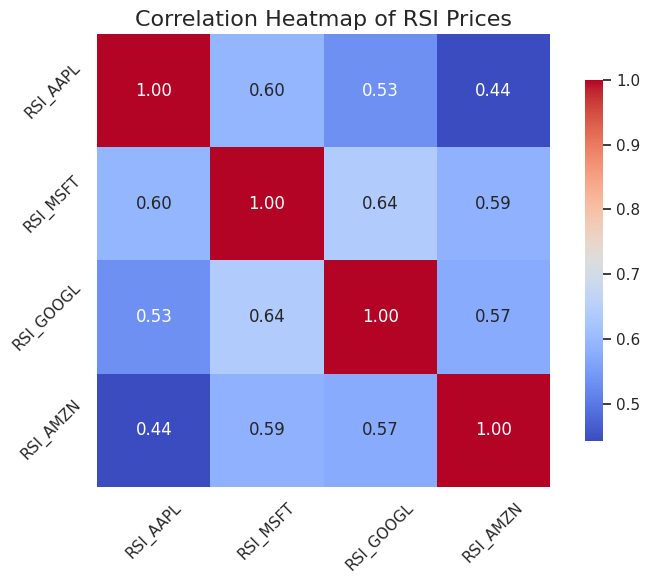

In [ ]:
selected_columns = []
for ticker in tickers:
    selected_columns.append(f'RSI_{ticker}')
selected_data = training_df[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Customize the heatmap
plt.title('Correlation Heatmap of RSI Prices', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

In [ ]:
class StockPricePredictor_R:
    def __init__(self, data, target_company):
        self.data = data
        self.target_company = target_company
        self.features = None
        self.target = None
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self):
      # Prepare the target variable for the selected company
        self.target = self.data[f'Close_{self.target_company}']
        # Extract relevant features for the model
        self.features = self.data[[col for col in self.data.columns if ('Close' not in col) and ('Date' not in col) and (self.target_company not in col)]]



    def create_datasets(self):
        # Create feature set (X) and target variable (y)
        X = self.features.values
        y = self.target.values
        return X, y

    def train_model(self, X, y):
        # Split data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the model
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.model.fit(self.X_train, self.y_train)

        # Make predictions
        y_pred = self.model.predict(self.X_test)

        # Evaluate model performance
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f'Mean Squared Error: {mse:.2f}')
        print(f'R² Score: {r2:.2f}')

        return y_pred

    def plot_predictions(self, y_pred):
        # Create a DataFrame to compare actual and predicted values
        results = pd.DataFrame({
            'Actual': self.y_test,
            'Predicted': y_pred
        })

        # Plot actual vs predicted
        plt.figure(figsize=(12, 6))
        plt.plot(results.index, results['Actual'], label='Actual', color='blue')
        plt.plot(results.index, results['Predicted'], label='Predicted', color='orange')
        plt.title(f'Actual vs Predicted Closing Price of {self.target_company}')
        plt.xlabel('Index')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.grid()
        plt.show()

    def feature_importances(self):
        # Plot feature importances
        feature_importances = self.model.feature_importances_
        features = self.features.columns

        # Create a DataFrame for feature importances
        importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plotting the feature importances
        plt.figure(figsize=(12, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.title('Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

Mean Squared Error: 1.83
R² Score: 1.00


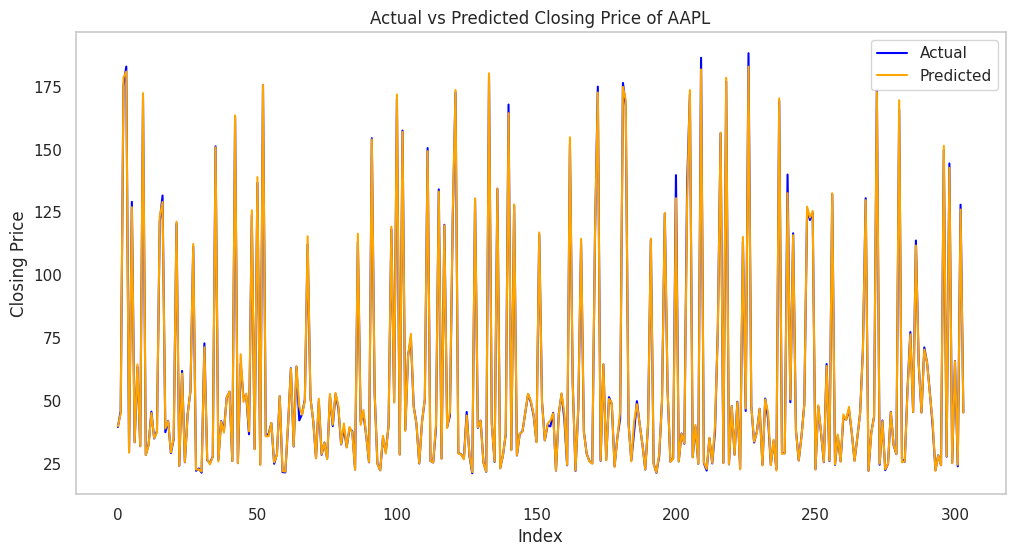

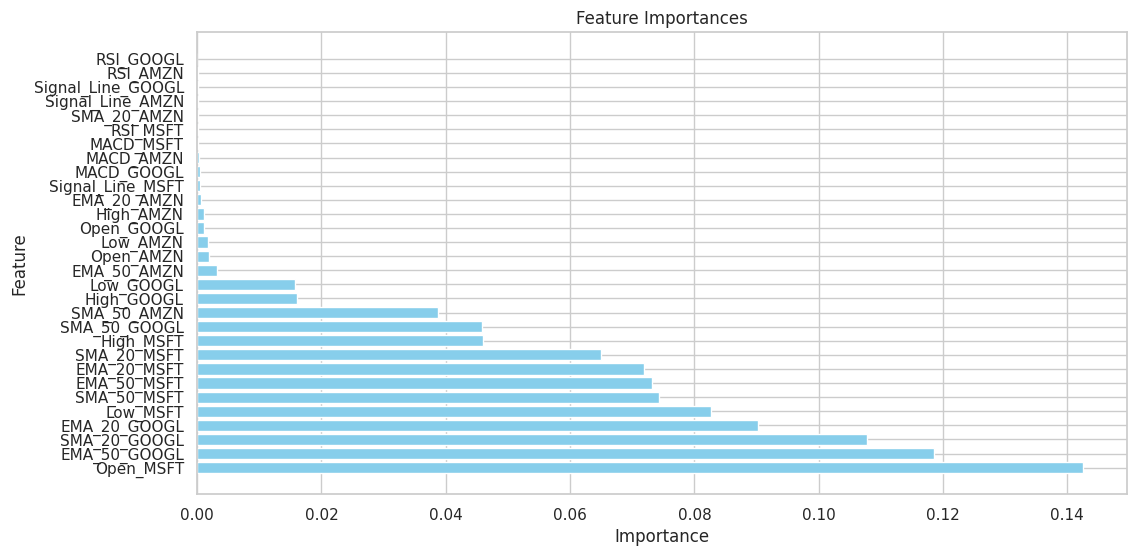

In [ ]:
predictor = StockPricePredictor_R(training_df,'AAPL')
predictor.prepare_data()
X, y = predictor.create_datasets()
y_pred = predictor.train_model(X, y)
predictor.plot_predictions(y_pred)
predictor.feature_importances()

In [ ]:
class StockPricePredictor_L:
    def __init__(self, data, target_company):
        self.data = data
        self.target_company = target_company
        self.features = None
        self.target = None
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self):
        # Prepare the target variable for the selected company
        self.target = self.data[f'Close_{self.target_company}']
        # Extract relevant features for the model
        self.features = self.data[[col for col in self.data.columns if ('Close' not in col) and ('Date' not in col) and (self.target_company not in col)]]

    def create_datasets(self):
        # Create feature set (X) and target variable (y)
        X = self.features.values
        y = self.target.values
        return X, y

    def train_model(self, X, y):
        # Split data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the Linear Regression model
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        # Make predictions
        y_pred = self.model.predict(self.X_test)

        # Evaluate model performance
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f'Mean Squared Error: {mse:.2f}')
        print(f'R² Score: {r2:.2f}')

        return y_pred

    def plot_predictions(self, y_pred):
        # Create a DataFrame to compare actual and predicted values
        results = pd.DataFrame({
            'Actual': self.y_test,
            'Predicted': y_pred
        })

        # Plot actual vs predicted
        plt.figure(figsize=(12, 6))
        plt.plot(results.index, results['Actual'], label='Actual', color='blue')
        plt.plot(results.index, results['Predicted'], label='Predicted', color='orange')
        plt.title(f'Actual vs Predicted Closing Price of {self.target_company}')
        plt.xlabel('Index')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.grid()
        plt.show()



Mean Squared Error: 39.36
R² Score: 0.98


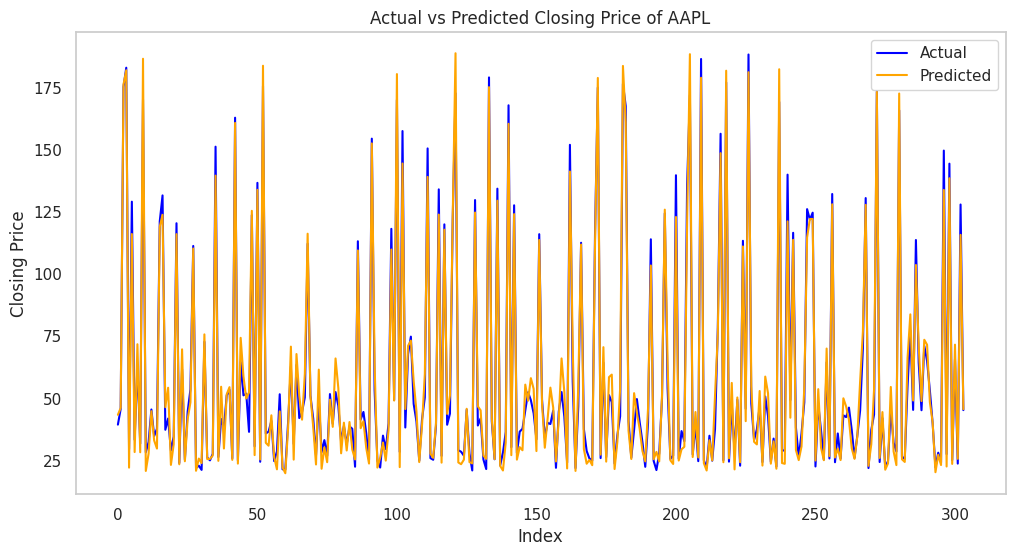

In [ ]:
predictor = StockPricePredictor_L(training_df,'AAPL')
predictor.prepare_data()
X, y = predictor.create_datasets()
y_pred = predictor.train_model(X, y)
predictor.plot_predictions(y_pred)